In [1]:
import numpy as np
from scipy.optimize import curve_fit, fsolve
from amid import AMID
import matplotlib.pyplot as plt

In [2]:
alphas = []
nalpha = 150
for i in np.arange(4, 600):
    g = lambda a: a/np.tan(a) - 1
    sol = fsolve(g, i)
    alphas.append(sol)
alphas = np.unique(np.around(alphas, 8))**2
alphas = alphas[:nalpha]

0.0
0.001
0.0031622
0.01
0.041622
0.1
0.31622


C:\Users\mitch\.conda\envs\Spyder425\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1.0


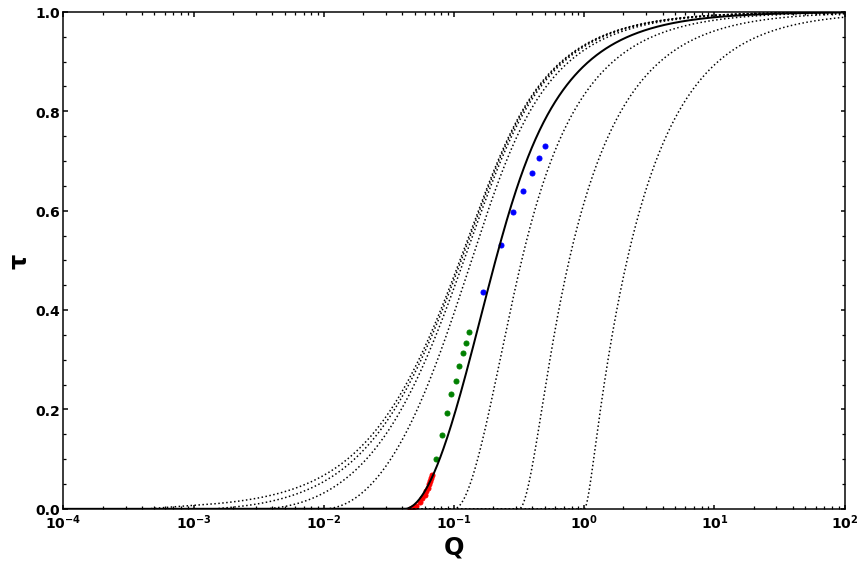

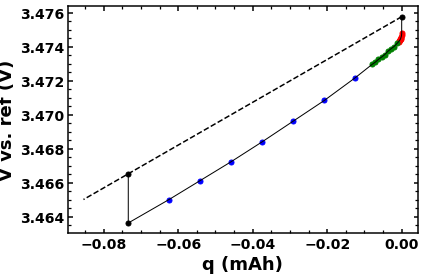

In [4]:
# Plot Atlung curve with various R_Ohm
R_Ohm = np.array([0, 1e-3, 3.1622e-3, 1e-2, 4.1622e-2, 1e-1, 3.1622e-1, 1])
#R_Ohm = np.array([4.1622e-2])
nQ = 1000
A = 3
B = 5

tau_thr1 = np.zeros(len(R_Ohm))
Q_thr1 = np.zeros(len(R_Ohm))
tau_thr2 = np.zeros(len(R_Ohm))
Q_thr2 = np.zeros(len(R_Ohm))
with plt.style.context('grapher'):                    
        
    plt.figure(figsize = (12, 8))

    Qdata1 = np.multiply([936.9481272, 982.020253, 1042.269145, 1125.729004, 1171.061585, 1241.139349, 1260.027133, 1306.831193, 1318.09162, 1344.926151, 1361.610518, 1394.621839], 4.8622e-5)
    taudata1 = [5.25006E-05, 0.000762789, 0.005267077, 0.013235003, 0.021261131, 0.02811711, 0.035631382, 0.042006877, 0.049234325, 0.055686901, 0.062348378, 0.068042586]
    
    Qdata2 = np.multiply([1495.507507, 1674.794112, 1802.17781, 1947.694541, 2126.962134, 2263.775466, 2391.172472, 2547.194879, 2666.960726], 4.8622e-5)
    taudata2 = [0.099626092, 0.148667614, 0.193645323, 0.230518091, 0.258102397, 0.286675559, 0.313220784, 0.333292378, 0.355819606]

    Qdata3 = np.multiply([3413.088058, 4691.579021, 5850.304137, 7009.766893, 8125.317216, 9186.439924, 10245.73184], 4.8622e-5)
    taudata3 = [0.436541704, 0.530730191, 0.596546795, 0.640533252, 0.675667141, 0.706478165, 0.731039196]
    
    plt.semilogx(Qdata1, taudata1, 'or', markersize=5)
    plt.semilogx(Qdata2, taudata2, 'og', markersize=5)
    plt.semilogx(Qdata3, taudata3, 'ob', markersize=5)
    
    for i in range(len(R_Ohm)):
        print(R_Ohm[i])
        Q_arr = np.logspace(-4, 2, nQ)
        tau_sol = np.zeros(nQ)
        tau_guess = 0.5
        for j in range(nQ):
            Q = Q_arr[j]
            func = lambda tau: tau - 1 + (1/(A*Q))*(1/B - 2*(np.sum(np.exp(-alphas*tau*Q)/alphas))) + R_Ohm[i]/Q if R_Ohm[i]<Q else tau 
            tau_sol[j] = fsolve(func, tau_guess, factor=1.)
            if tau_sol[j] < 0:
                tau_sol[j] = 0

        for j in range(nQ):
            Q = Q_arr[j]
            if 1/B*0.01 < 2*(np.sum(np.exp(-alphas*tau_sol[j]*Q)/alphas)):
                tau_thr1[i] = tau_sol[j]
                Q_thr1[i] = Q_arr[j]

            if 1/B*0.5 < 2*(np.sum(np.exp(-alphas*tau_sol[j]*Q)/alphas)):
                tau_thr2[i] = tau_sol[j]
                Q_thr2[i] = Q_arr[j]
        
        if R_Ohm[i] < 1e-1 and R_Ohm[i] > 1e-2: 
            plt.semilogx(Q_arr, tau_sol, '-k', linewidth=2)
        else:
            plt.semilogx(Q_arr, tau_sol, ':k')
        
        
        D = 8.68e-12
        r = 1.461e-4
        I = 6.9e-6
        dqdV = 0.000179
        V_arr = Q_arr/3600/D*r**2*I/dqdV
        #for i in range(len(V_arr)):
            #print(V_arr[i])
        #for i in range(len(V_arr)):
            #print(tau_sol[i])
        #print(np.transpose([Q_arr, tau_sol]).tolist())
    


    #plt.semilogx(Q_thr1, tau_thr1)
    #plt.semilogx(Q_thr2, tau_thr2)
    #plt.xlabel('$Q = 3600 n_{eff} D/ r^2$')
    #plt.ylabel('Fractional Capacity')
    plt.xlabel('Q', weight='bold', fontsize=24)
    plt.ylabel('τ', weight='bold', fontsize=24)
    plt.xlim([1e-4, 1e2])
    plt.ylim([0, 1])
    
    plt.savefig('abstract1.png')
    
    plt.figure()
    
    qdata0 = [0, -0.073422326, -0.073422326]
    Vdata0 = [3.475780548, 3.4636178, 3.466519215]
    qdata00 = [0, -0.085450475]
    Vdata00 = [3.475780548, 3.46500201]

    qdata1 = [-4.10252E-07, -4.57848E-05, -0.000124259, -0.000207653, -0.000291047, -0.000374442, -0.000457838, -0.000541234, -0.00062463, -0.000708027, -0.000791423]
    Vdata1 = [3.474794876, 3.474684078, 3.474596278, 3.474548588, 3.474474866, 3.474454996, 3.474405758, 3.474393912, 3.474365682, 3.47434813, 3.474313402]
    
    qdata2 = [-0.001242605, -0.002076583, -0.002910557, -0.00374453, -0.004578501, -0.00541247, -0.006246446, -0.00708042, -0.0079144]
    Vdata2 = [3.47420727, 3.47401866, 3.473884652, 3.473731568, 3.473542978, 3.47339905, 3.473265028, 3.473100892, 3.472974898]
    
    qdata3 = [-0.012426383, -0.020766549, -0.0291068, -0.037446976, -0.045787256, -0.054127439, -0.062467646]
    Vdata3 = [3.47218997, 3.470844994, 3.469626012, 3.468406254, 3.467232692, 3.466116388, 3.46500201]
    
    qdataall = np.concatenate(([qdata0[0]], qdata1, qdata2, qdata3, qdata0[1:3]))
    Vdataall = np.concatenate(([Vdata0[0]], Vdata1, Vdata2, Vdata3, Vdata0[1:3]))

    plt.plot(qdata1, Vdata1, 'or', markersize=5)
    plt.plot(qdata2, Vdata2, 'og', markersize=5)
    plt.plot(qdata3, Vdata3, 'ob', markersize=5)
    plt.plot(qdataall, Vdataall, '-', linewidth=1)
    plt.plot(qdata0, Vdata0, 'ok', markersize=5)
    plt.plot(qdata00, Vdata00, '--k', markersize=5)

    
    plt.xlabel('q (mAh)', weight='bold', fontsize=18)
    plt.ylabel('V vs. ref (V)', weight='bold', fontsize=18)
    
    plt.savefig('abstract2.png')
